# Student Performance Indicator

## Life Cycle of Machine Learning Project 
- Understaing The Problem Statement
-Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model 

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

Show Top 5 Recored

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of Dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score
### 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column
### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing value in dataset

### 3.2 Check Duplicates 

In [6]:
df.duplicated().sum()

0

There is no duplicates value in dataset

### 3.3 Check Datatypes

In [7]:
# Check null and dtpyes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


 ### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of dataset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05
- All standard deviations are also close - between 14.6 and 15.19
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.6 Exploring Data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'Gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'Lunch' variable:", end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:", end=" ")
print(df['test_preparation_course'].unique())

Categories in 'Gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'Lunch' variable: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [12]:
# define numerical & categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print Columns

print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))

print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


#### Adding columns for 'Total_score' and 'Average' 

In [14]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score']== 100]['average'].count()
writing_full = df[df['writing_score']== 100]['average'].count()
math_full = df[df['math_score']== 100]['average'].count()

## Print

print(f'Number of student with full marks in Reading: {reading_full}')
print(f'Number of student with full marks in Writing: {writing_full}')
print(f'Number of student with full marks in Math: {math_full}')
      

Number of student with full marks in Reading: 17
Number of student with full marks in Writing: 14
Number of student with full marks in Math: 7


In [16]:
reading_less_20 = df[df['reading_score'] <=20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

## Print

print(f'Number of student with less than 20 marks in Reading: {reading_less_20}')
print(f'Number of student with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of student with less than 20 marks in Math: {math_less_20}')

Number of student with less than 20 marks in Reading: 1
Number of student with less than 20 marks in Writing: 3
Number of student with less than 20 marks in Math: 4


##### Insight
- From above values we get student have worst performance in math.
- Best performance in reading section.

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)
#### 4.1.1 Histogram & KDE


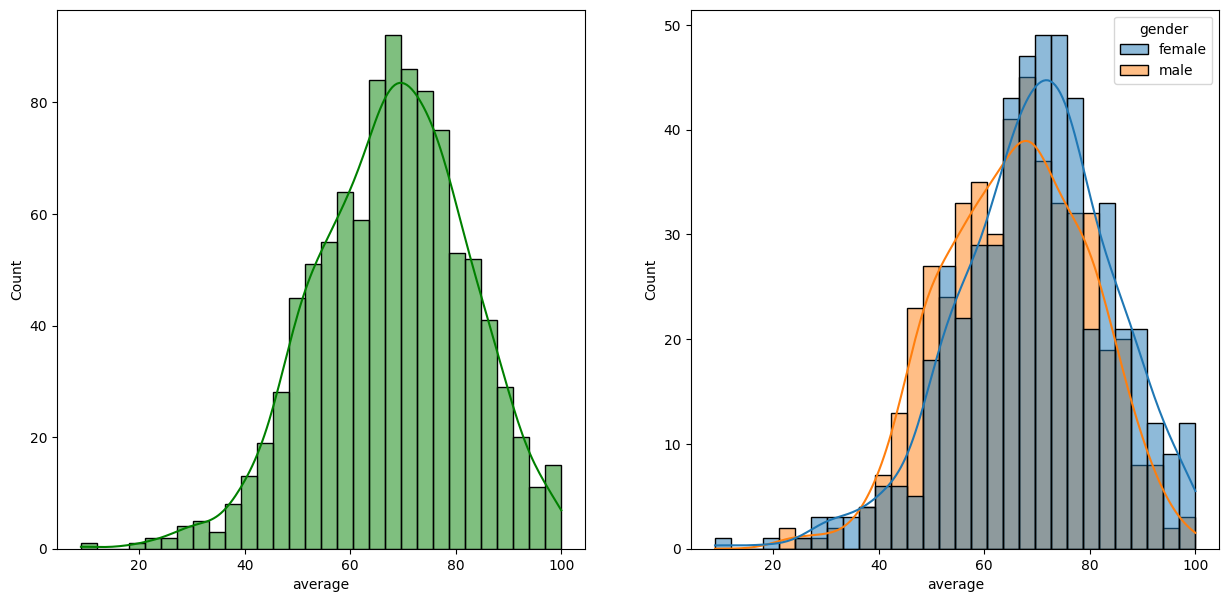

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender')
plt.show()

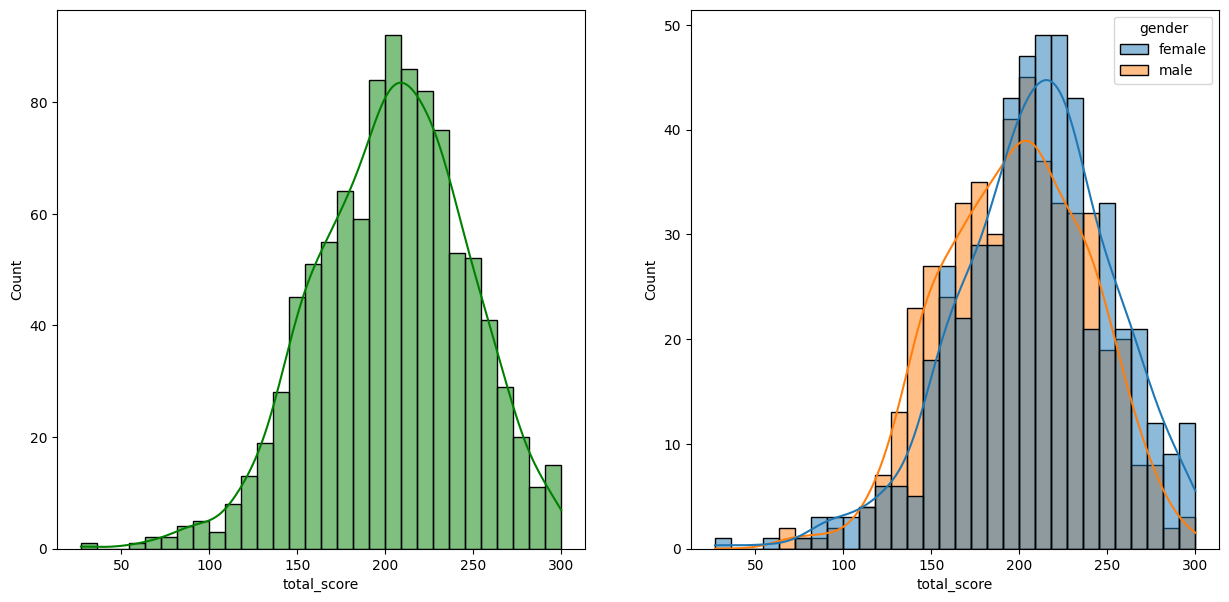

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', bins=30, kde=True, hue='gender')
plt.show()

#### Insight
- Female students tends to perform well then male students.

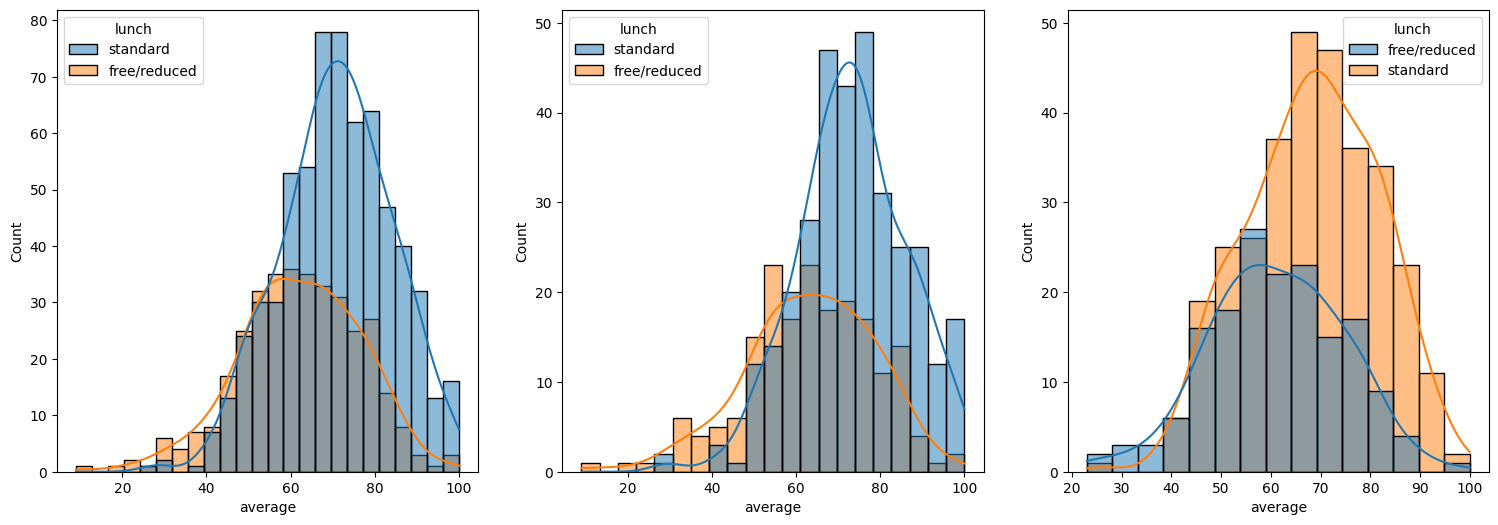

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender== 'female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender== 'male'], x='average', kde=True, hue='lunch')
plt.show()

#### Insight
- Standard lunch help perform well in exams.
- Standard lunch help perform well in exams for both `Male` & `Female`.

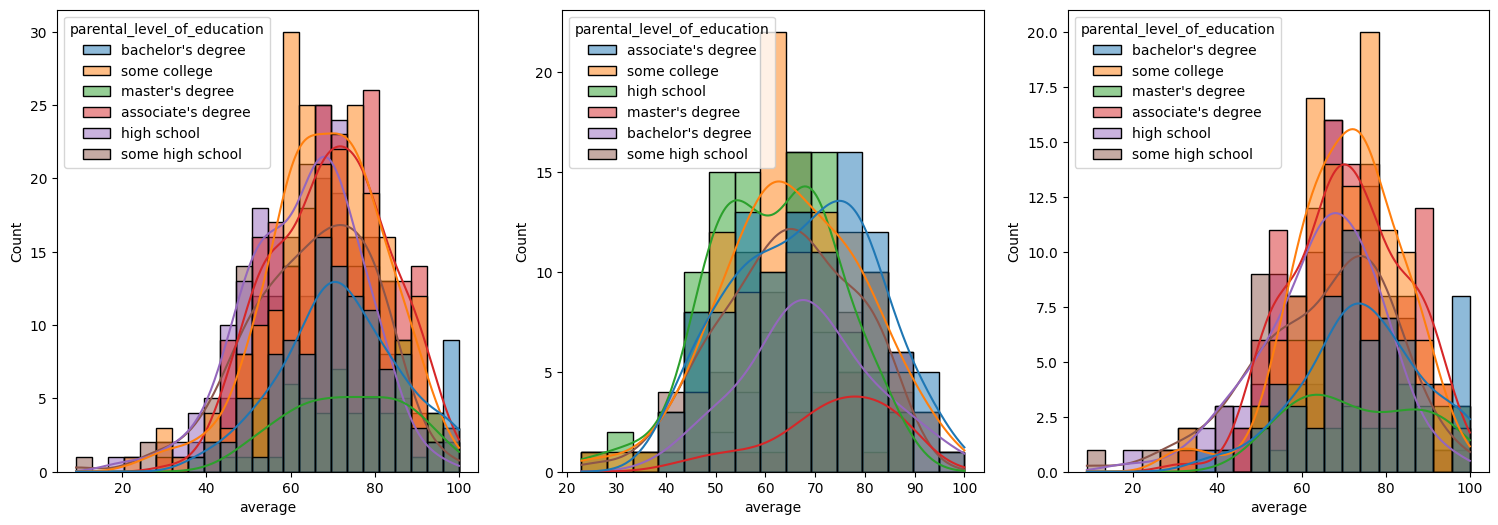

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender== 'male'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender== 'female'], x='average', kde=True, hue='parental_level_of_education')
plt.show()

#### Insight
- In general parent's education don't help student to perform well in exams. 
- 2nd plot show parent's whose education is `associate's degree` & `master's degree` their male child tends to perform well in exams.
- 3rd plot show there is no effect of parent's education on female students.

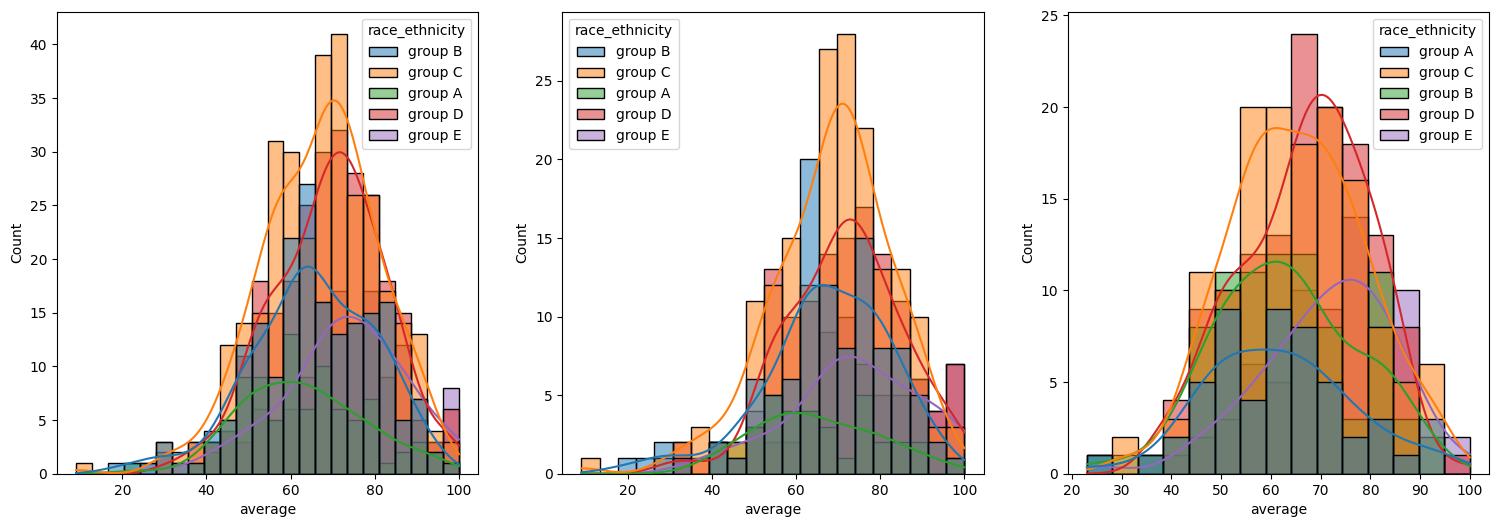

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#### Insight
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

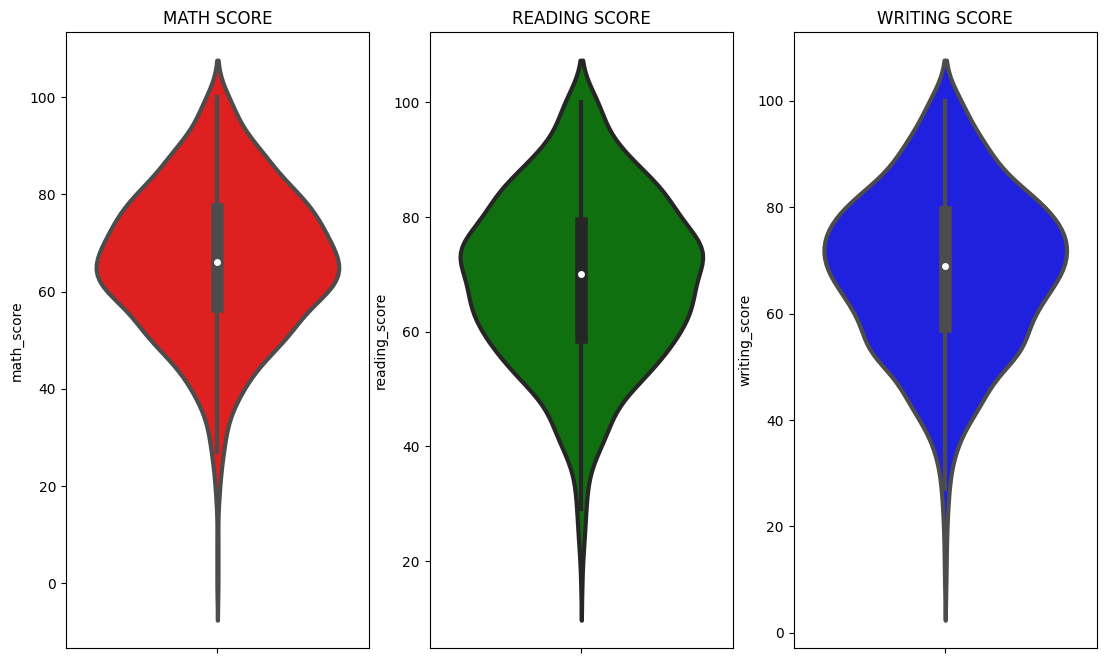

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORE')
sns.violinplot(data=df,y='math_score', color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORE')
sns.violinplot(data=df,y='reading_score',color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(data=df,y='writing_score', color='blue', linewidth=3)
plt.show()

#### Insight
- It can be seen that most of the student score between 60-80 in Maths.
- It can be seen taht most of the student score between 50-80 in Reading and Writing.

#### 4.3 Multivariate analysis using pieplot

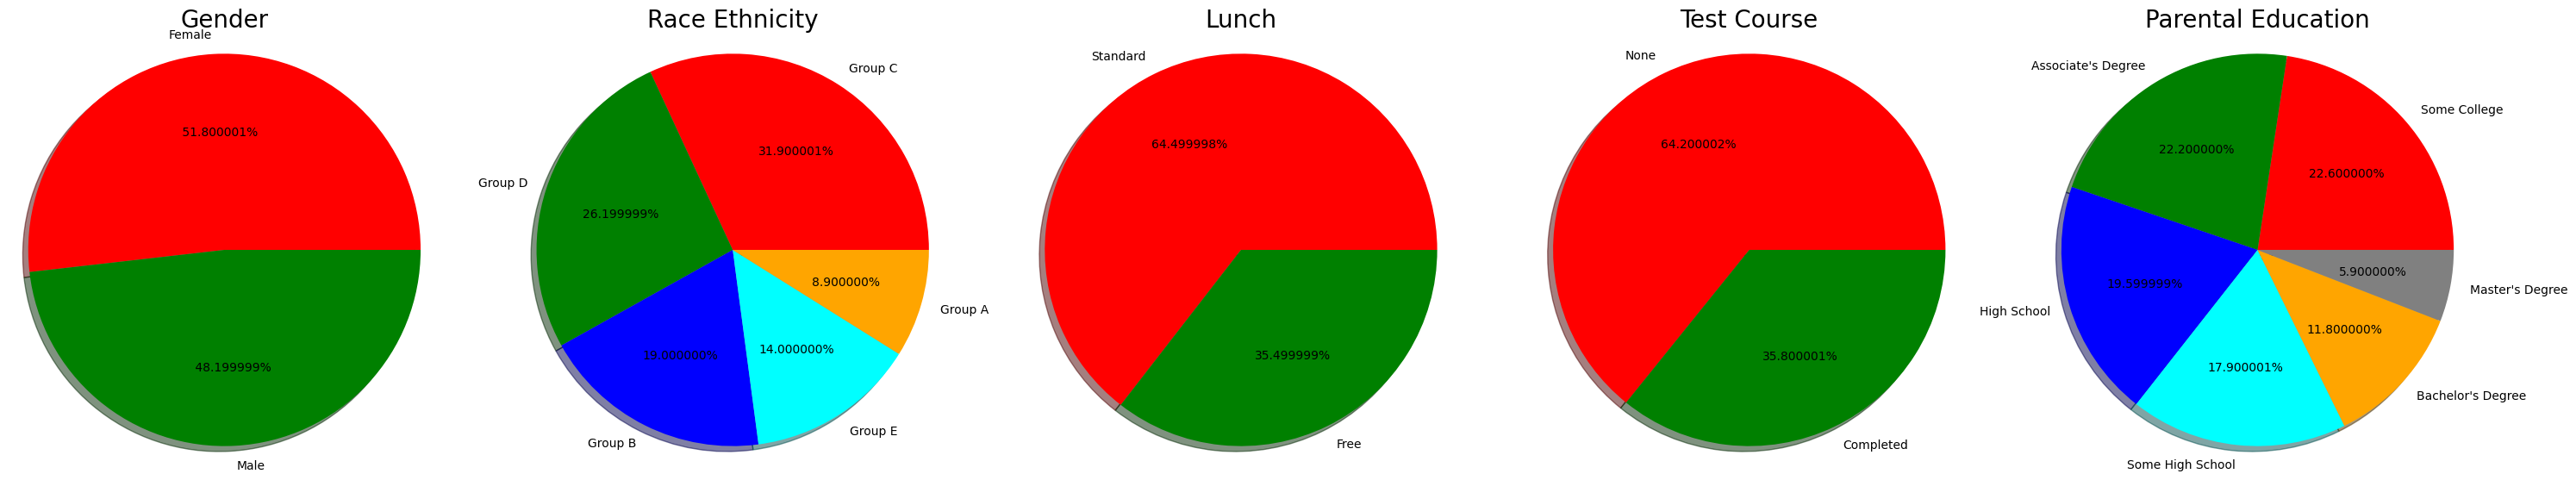

In [23]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color= ['red', 'green']

plt.pie(size, colors=color, labels= labels, autopct= ' %2f%%', frame=True, shadow= True)
plt.title('Gender', fontsize=20)
plt.axis('off')


plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors= color, labels=labels, autopct='%2f%%', frame=True, shadow= True)
plt.title('Race Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%', frame=True, shadow= True)
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%', frame=True, shadow= True)
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%', frame=True, shadow= True)
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insight
- Number of `Male` & `Female` students are aqual.
- Number of students are maximum in `Group C`.
- Number of students who have `Standar Lunch` are greater.
- Number of students who have `not` enrolled in any test preparation course is greater
- Number of students whose parental education is `Some College` is greater followed closely by `Associate's Degree`.

### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

##### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

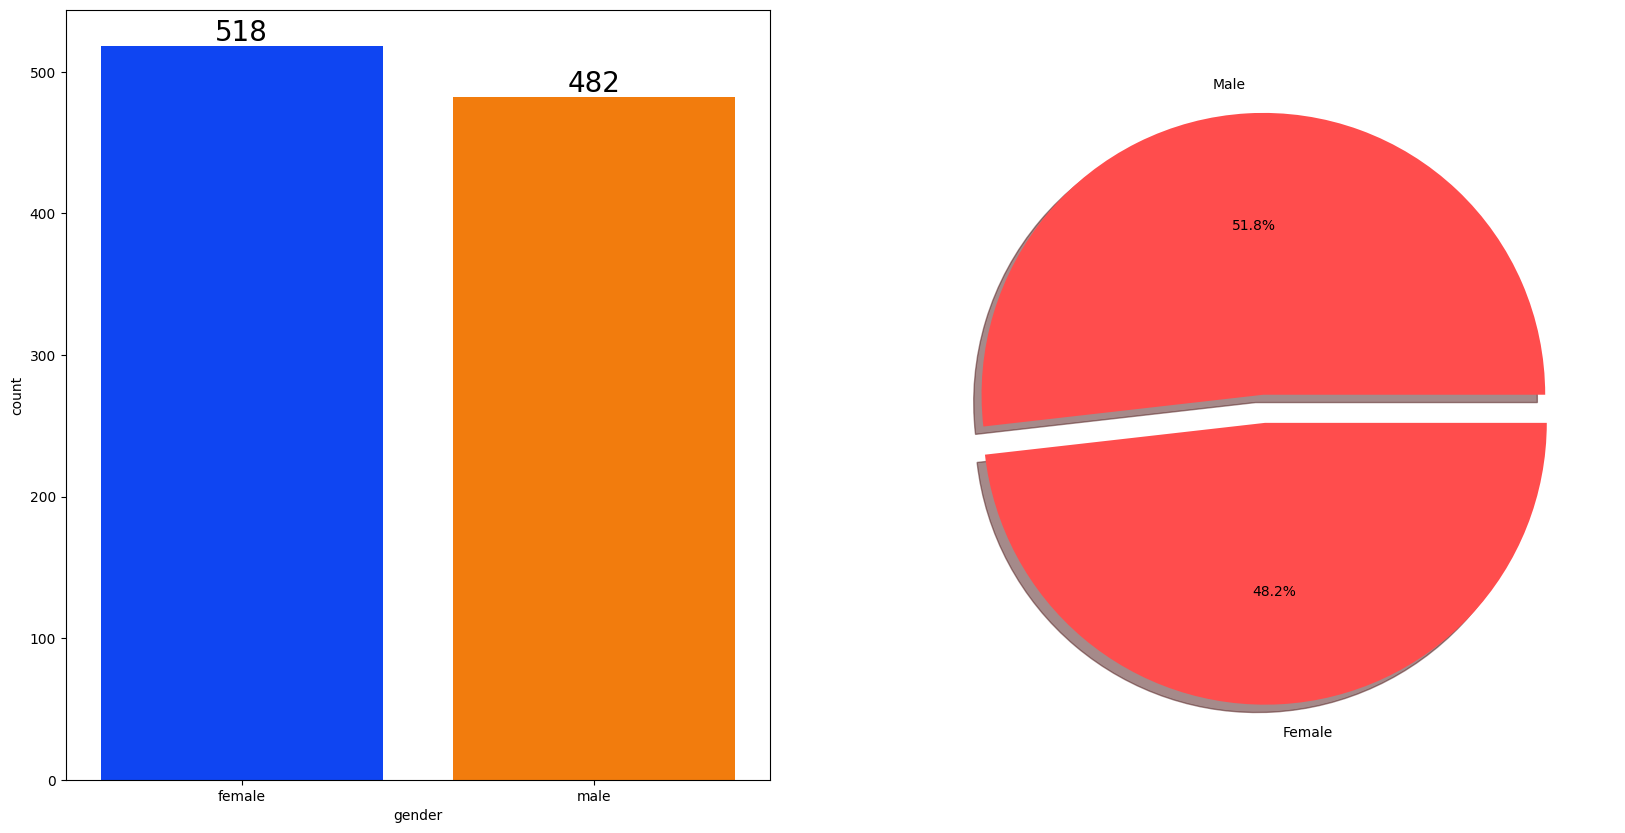

In [24]:
f, ax= plt.subplots(1, 2, figsize=(20,10))
sns.countplot(data=df, x=df['gender'], saturation= 0.9, ax= ax[0], palette='bright')

for container in ax[0].containers:
    ax[0].bar_label(container, color= 'black', size=20)
plt.pie(x=df['gender'].value_counts(), labels= ['Male', 'Female'], explode= [0, 0.1], autopct='%1.1f%%', shadow= True,colors=['#ff4d4d'])

plt.show()

#### Insights
- Gender has balanced data with `Female` students are 518 (48%) and `Male` students are 482 (52%)

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [25]:
gendergroup = df.groupby('gender')[['total_score', 'math_score', 'reading_score', 'writing_score']].mean()
gendergroup

,total_score,math_score,reading_score,writing_score
gender,,,,
female,208.708494,63.633205,72.608108,72.467181
male,197.512448,68.728216,65.473029,63.311203


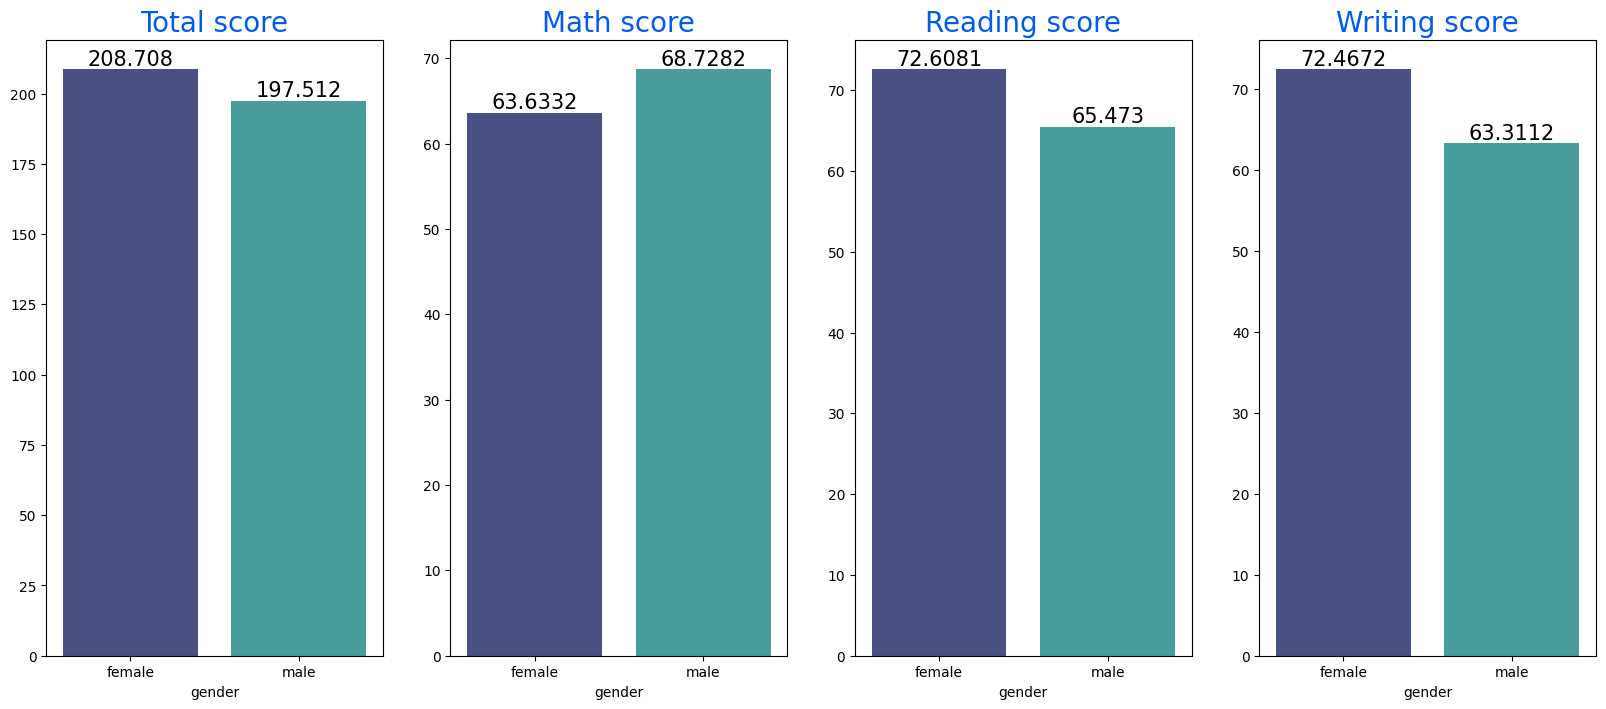

In [26]:
gender_group = df.groupby('gender')
f,ax=plt.subplots(1,4,figsize=(20,8))

sns.barplot(x=gender_group['total_score'].mean().index,y=gender_group['total_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Total score',color='#005ce7',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=gender_group['math_score'].mean().index,y=gender_group['math_score'].mean().values,palette = 'mako',ax=ax[1])
ax[1].set_title('Math score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)


sns.barplot(x=gender_group['reading_score'].mean().index,y=gender_group['reading_score'].mean().values,palette = 'mako',ax=ax[2])
ax[2].set_title('Reading score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)


sns.barplot(x=gender_group['writing_score'].mean().index,y=gender_group['writing_score'].mean().values,palette = 'mako',ax=ax[3])
ax[3].set_title('Writing score',color='#005ce6',size=20)

for container in ax[3].containers:
    ax[3].bar_label(container, color='black', size=15)



#### Insights
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.


##### 4.4.2 RACE_EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race_Ehnicity has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

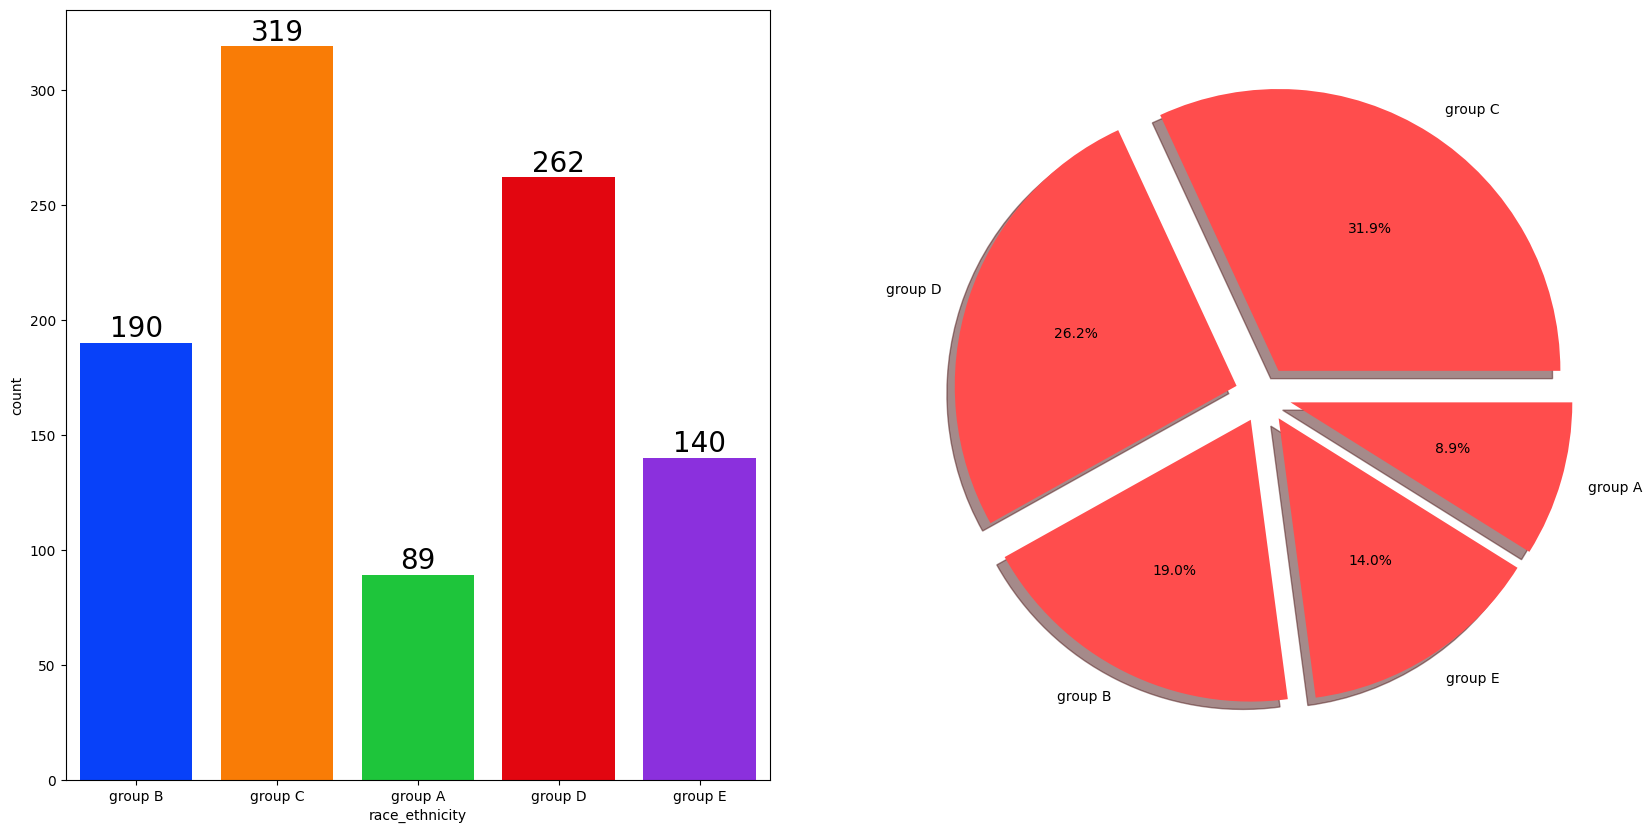

In [27]:
f, ax = plt.subplots(1,2, figsize=(20, 10))

sns.countplot(data=df, x=df['race_ethnicity'], palette='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(df['race_ethnicity'].value_counts(), labels= df['race_ethnicity'].value_counts().index, explode=[0.1,0.1,0.1,0.1,0.1], autopct='%1.1f%%', shadow= True,colors=['#ff4d4d'])
plt.show()

#### Insight
- Most of the students are belong to `Group C` and `Group D`.
- Lowest number of students are in `Group A`.

BIVARIATE ANALYSIS ( Is Race_Ethnicity has any impact on student's performance ? )

In [28]:
race_group = df.groupby('race_ethnicity')[['total_score', 'math_score', 'reading_score', 'writing_score']].mean()
race_group

,total_score,math_score,reading_score,writing_score
race_ethnicity,,,,
group A,188.977528,61.629213,64.674157,62.674157
group B,196.405263,63.452632,67.352632,65.600000
group C,201.394984,64.463950,69.103448,67.827586
group D,207.538168,67.362595,70.030534,70.145038
group E,218.257143,73.821429,73.028571,71.407143


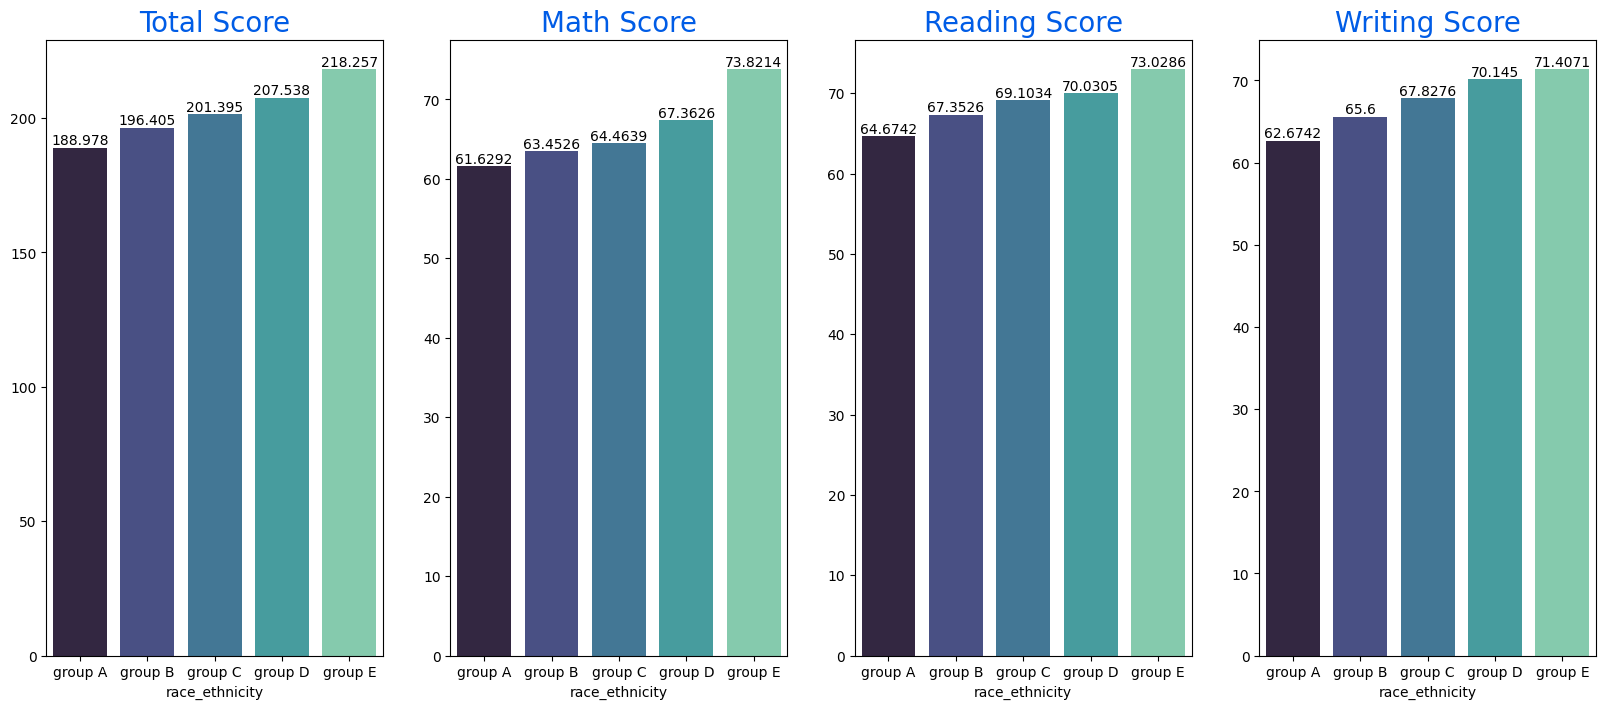

In [29]:
race_group = df.groupby('race_ethnicity')
f, ax = plt.subplots(1,4,figsize=(20,8))

# Total Score Vs Race Ethnicity
sns.barplot(x= race_group['total_score'].mean().index, y= race_group['total_score'].mean().values, palette = 'mako',ax=ax[0])
ax[0].set_title('Total Score', color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)

# Total Score Vs Math Score

sns.barplot(x=race_group['math_score'].mean().index, y= race_group['math_score'].mean().values, palette= 'mako', ax=ax[1])
ax[1].set_title('Math Score', color= '#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=10)

# Total Score Vs Reading Score

sns.barplot(x=race_group['reading_score'].mean().index, y= race_group['reading_score'].mean().values, palette= 'mako', ax=ax[2])
ax[2].set_title('Reading Score', color= '#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=10)

# Total Score Vs Writing Score

sns.barplot(x=race_group['writing_score'].mean().index, y= race_group['writing_score'].mean().values, palette= 'mako', ax=ax[3])
ax[3].set_title('Writing Score', color= '#005ce6', size=20)

for container in ax[3].containers:
    ax[3].bar_label(container, color='black', size=10)

#### Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

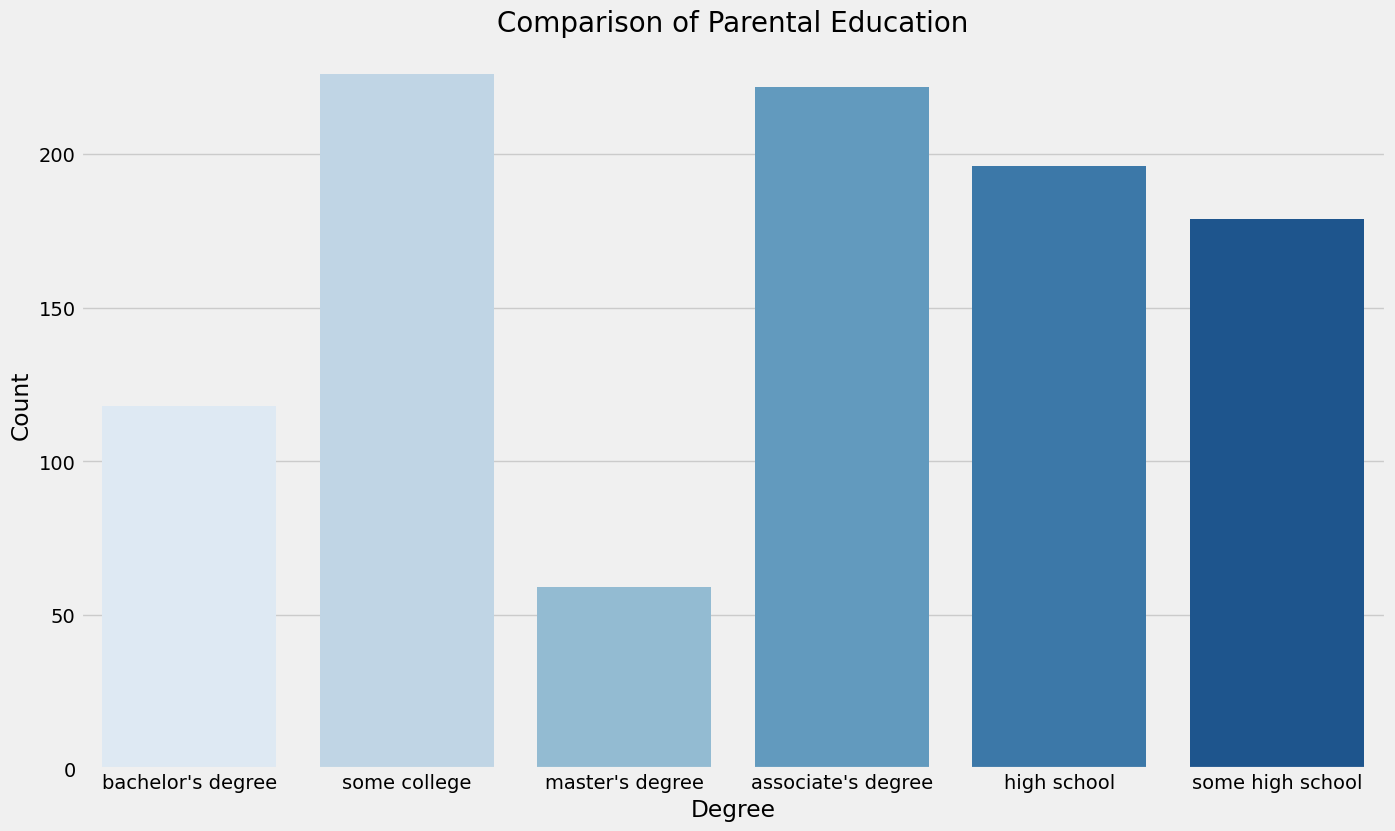

In [30]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data=df, x= df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight= 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

In [31]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [32]:
parent_group = df.groupby('parental_level_of_education')[['total_score', 'math_score', 'reading_score', 'writing_score']].mean()
parent_group 


,total_score,math_score,reading_score,writing_score
parental_level_of_education,,,,
associate's degree,208.707207,67.882883,70.927928,69.896396
bachelor's degree,215.771186,69.389831,73.000000,73.381356
high school,189.290816,62.137755,64.704082,62.448980
master's degree,220.796610,69.745763,75.372881,75.677966
some college,205.429204,67.128319,69.460177,68.840708
some high school,195.324022,63.497207,66.938547,64.888268


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


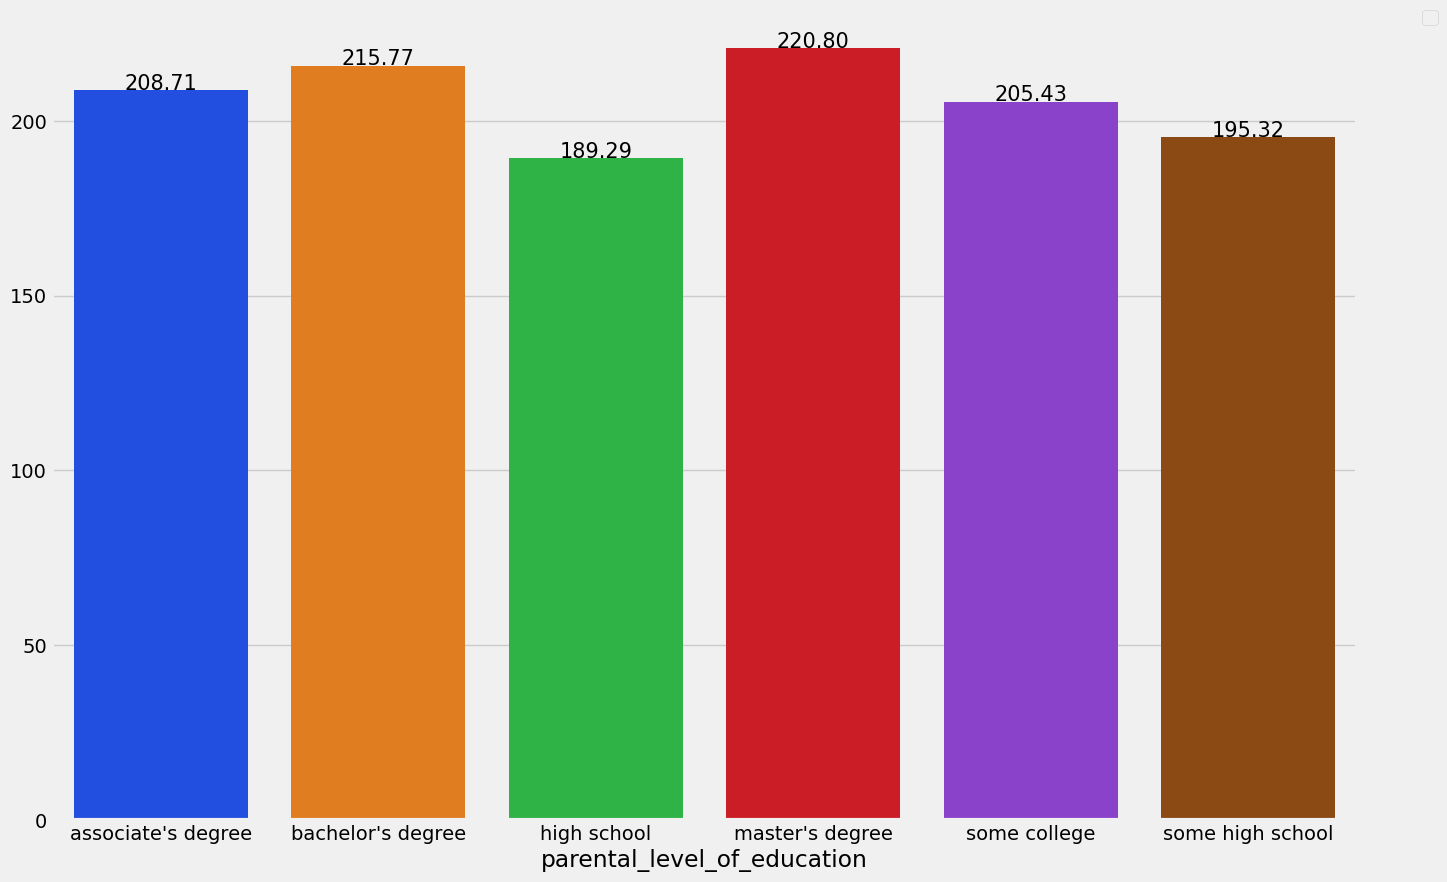

In [33]:
parent_group = df.groupby('parental_level_of_education')
plt.subplots(figsize= (15,10))
plot = sns.barplot(x= parent_group['total_score'].mean().index, y=parent_group['total_score'].mean().values, palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
plt.show()

#### Insight

- The student whose parents posses education level of `bachlor's degree` and `master's degree` has good performance then other student parent education.

#### 4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

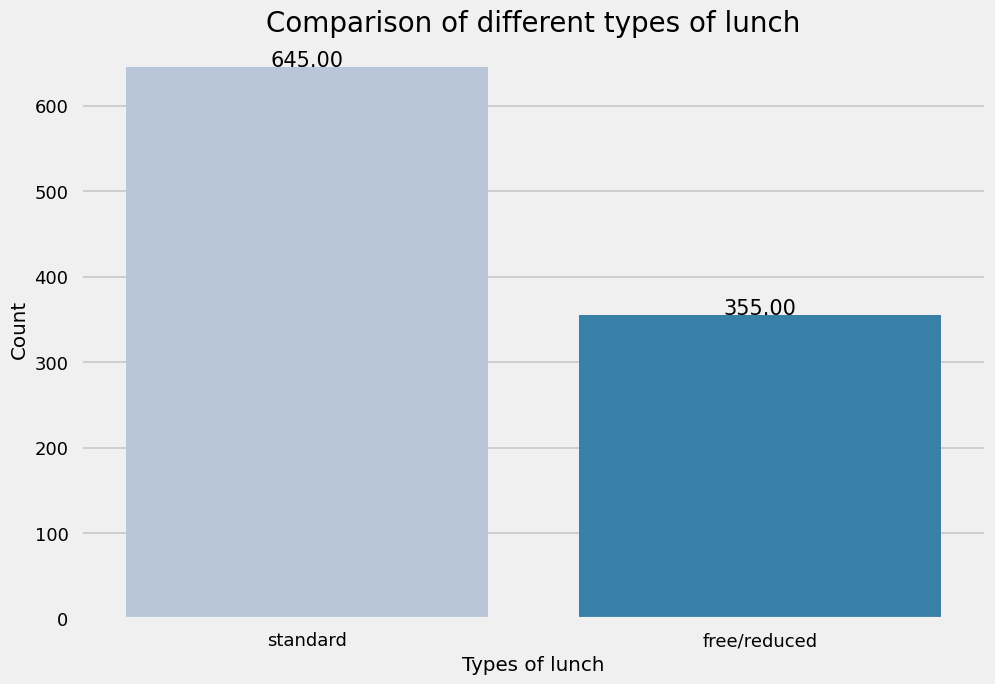

In [34]:
plt.rcParams['figure.figsize']= (15, 9)
plt.style.use('seaborn-talk')
plot= sns.countplot(data=df, x=df['lunch'], palette= 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Types of lunch')
plt.ylabel('Count')

for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')

plt.show()

#### Insights
- Students being served Standard lunch was more than free lunch


BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

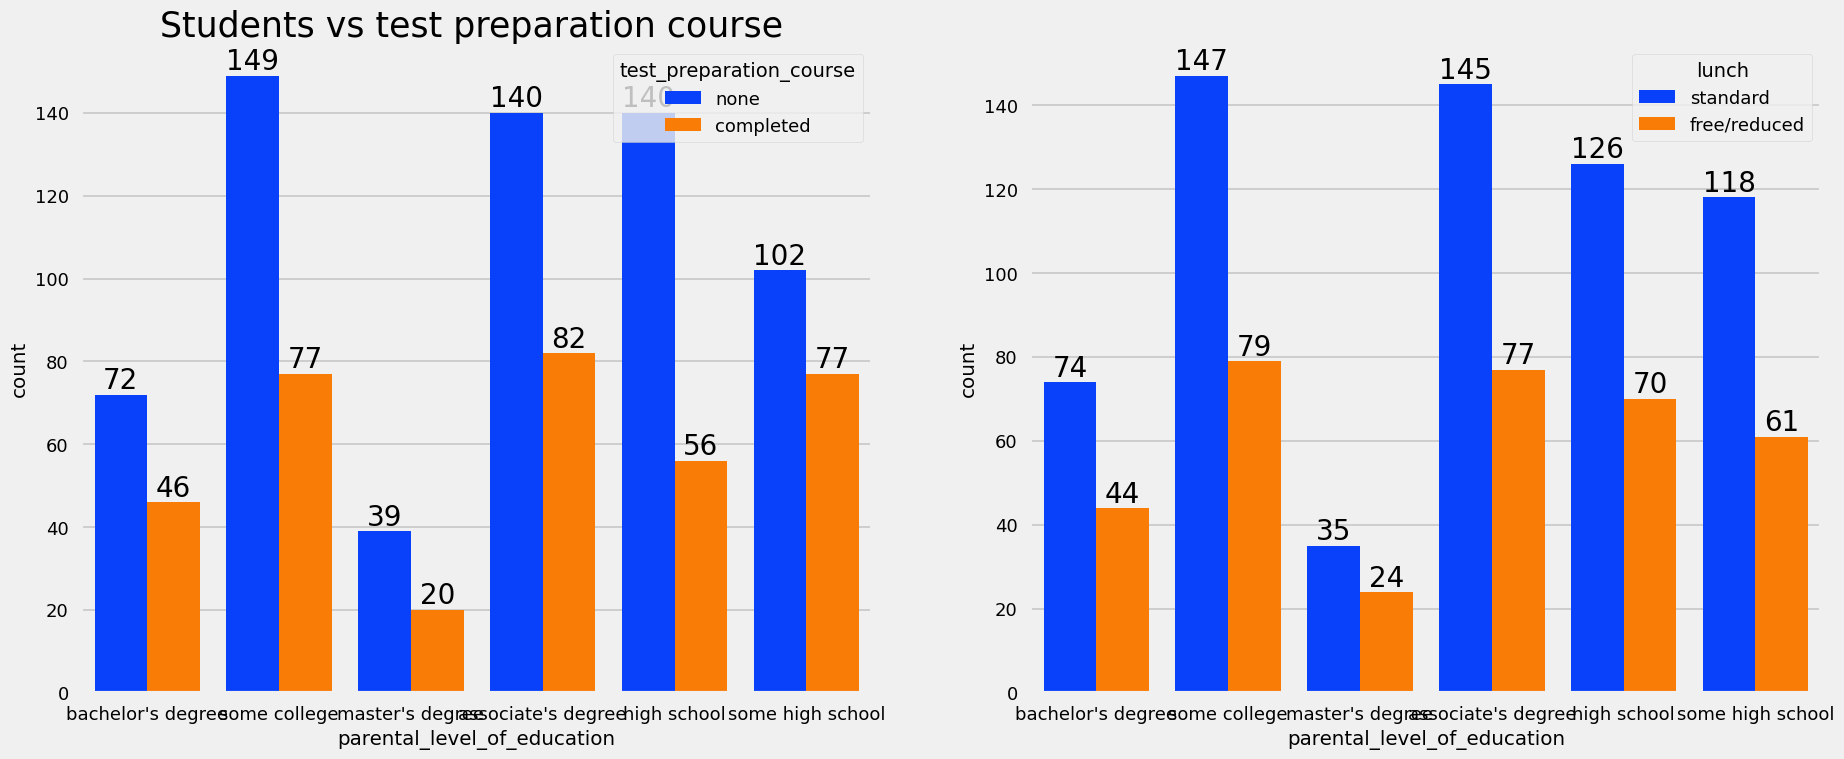

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   


#### Insights
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch
##### 4.4.5 TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

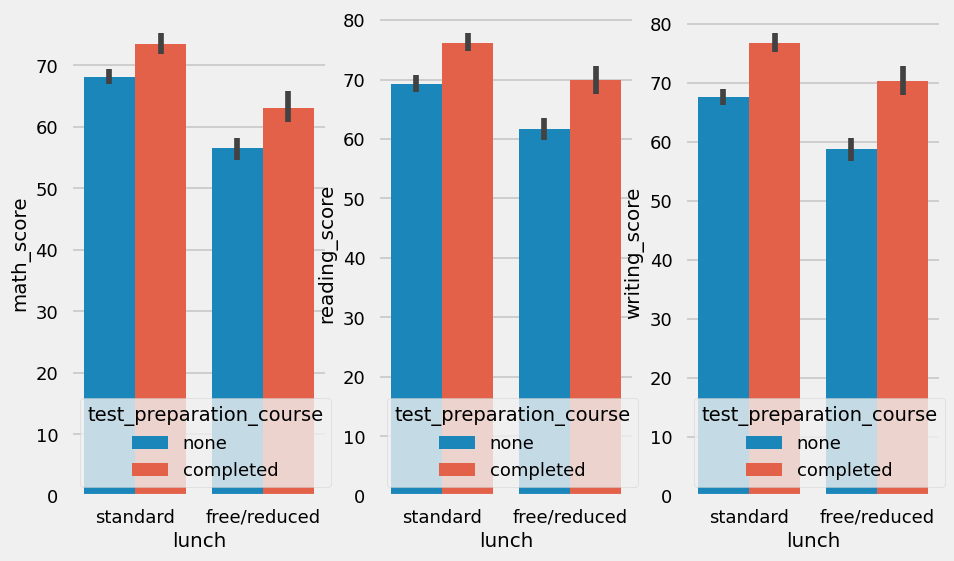

In [36]:
f, ax= plt.subplots(1, 3, figsize=(10,6))

sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'],ax=ax[0])

sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'], ax=ax[1])

sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'], ax=ax[2])

#### Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course
#### 4.4.6 CHECKING OUTLIERS

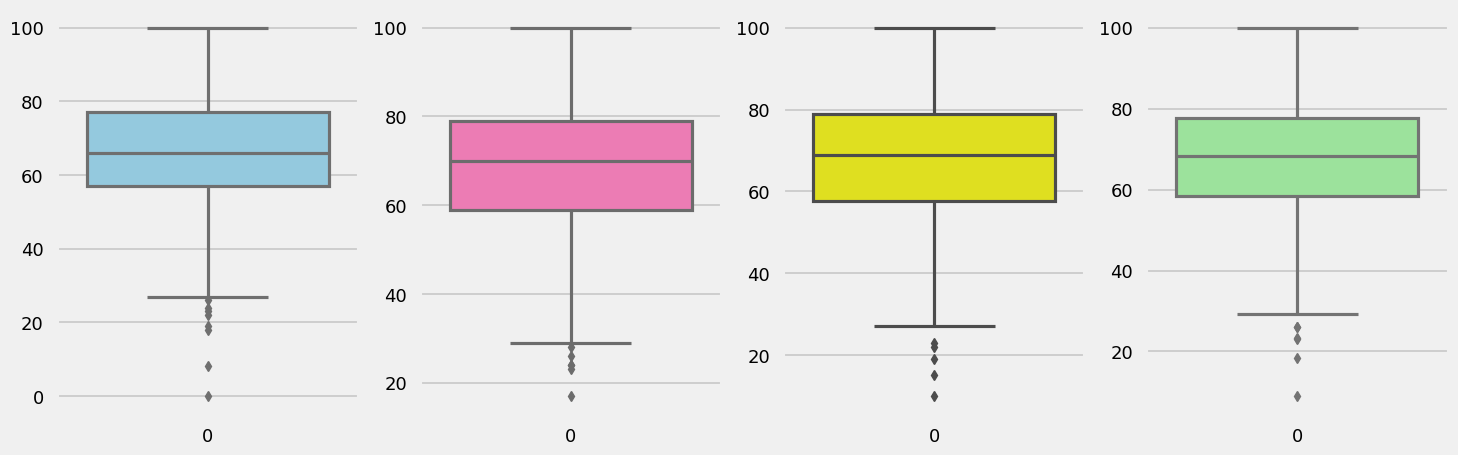

In [37]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

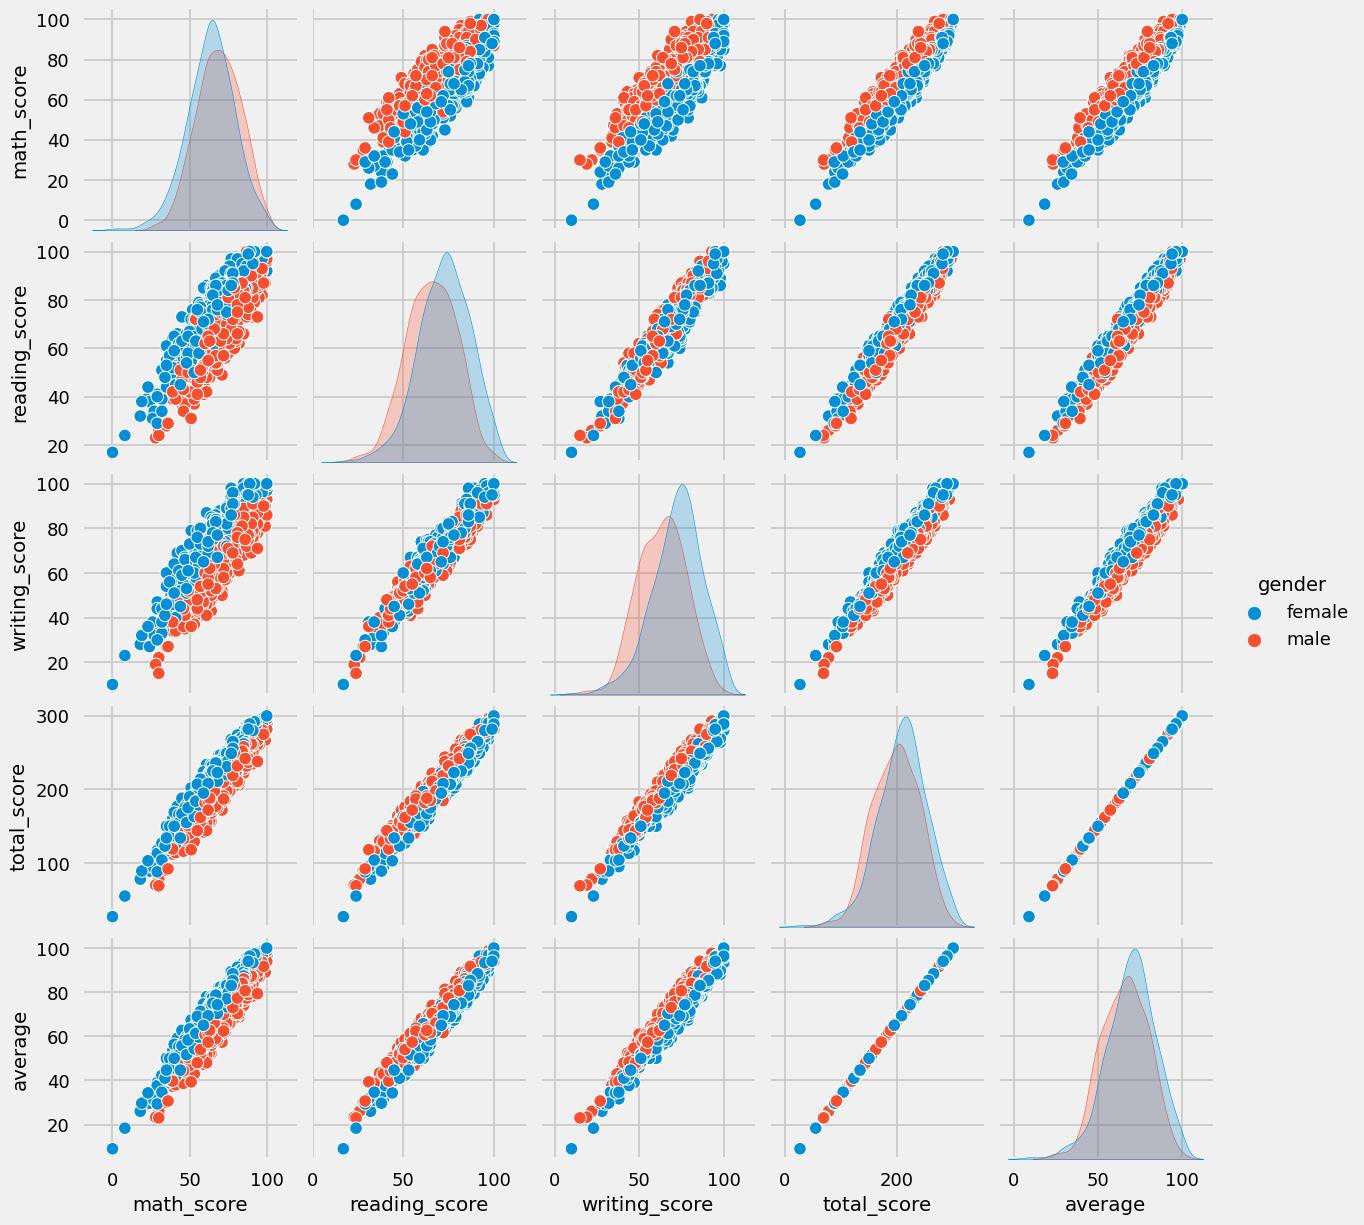

In [38]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.
### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.